<a href="https://colab.research.google.com/github/rajsaumyaa/ML_labs/blob/main/exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2842693220.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-2842693220.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Logistic Regression Accuracy (10-fold CV): 0.7957428214731586
Decision Tree Accuracy (10-fold CV): 0.784569288389513


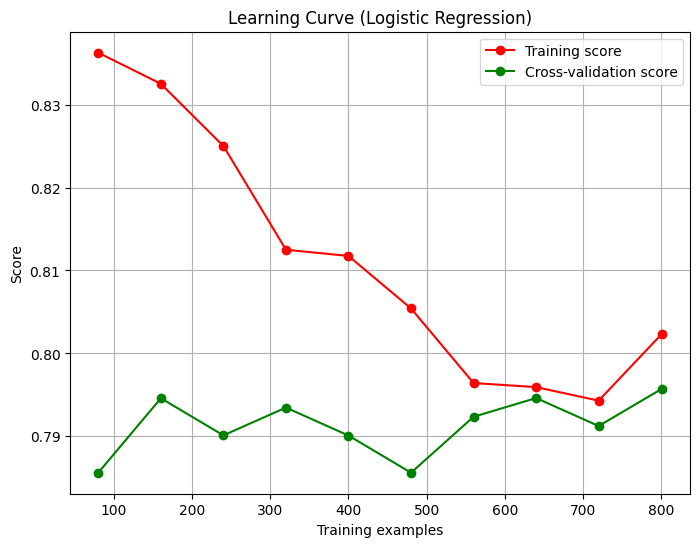

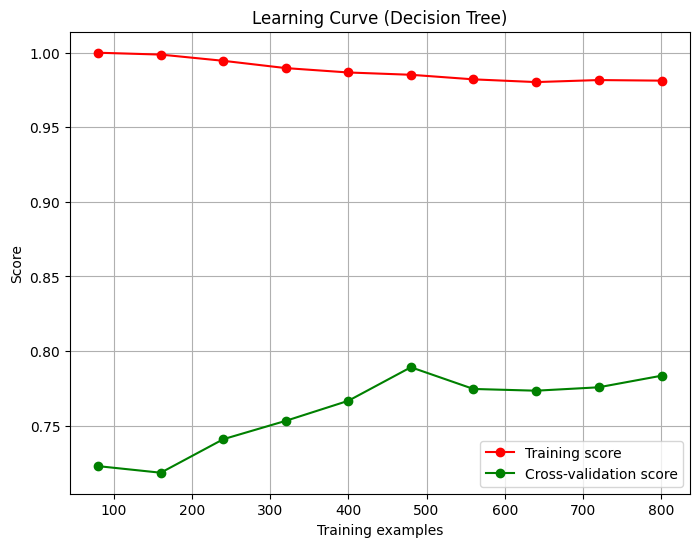

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Preprocess data
# Select useful features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[features + ['Survived']]

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

# Features and target
X = data[features]
y = data['Survived']

# Logistic Regression with 10-fold CV
log_reg = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_reg, X, y, cv=10)
print("Logistic Regression Accuracy (10-fold CV):", log_scores.mean())

# Decision Tree with 10-fold CV
tree = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree, X, y, cv=10)
print("Decision Tree Accuracy (10-fold CV):", tree_scores.mean())

# Plot learning curves
def plot_learning_curve(estimator, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=10,
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Learning curves for Logistic Regression
plot_learning_curve(log_reg, "Learning Curve (Logistic Regression)", X, y)

# Learning curves for Decision Tree
plot_learning_curve(tree, "Learning Curve (Decision Tree)", X, y)
